# Football Rugby Image classification with CNNs

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Google Collab Setup

In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [0]:
import cv2

In [4]:
!pip install fastai

    100% |████████████████████████████████| 430kB 1.7MB/s 
    100% |████████████████████████████████| 1.2MB 1.2MB/s 
    100% |████████████████████████████████| 1.4MB 919kB/s 
    100% |████████████████████████████████| 71kB 7.8MB/s 
    100% |████████████████████████████████| 256kB 4.2MB/s 
    100% |████████████████████████████████| 20.8MB 70kB/s 


    100% |████████████████████████████████| 3.4MB 429kB/s 
    100% |████████████████████████████████| 112kB 11.3MB/s 
    100% |████████████████████████████████| 51kB 11.5MB/s 
    100% |████████████████████████████████| 61kB 11.2MB/s 
    100% |████████████████████████████████| 2.2MB 637kB/s 
    100% |████████████████████████████████| 4.1MB 369kB/s 
    100% |████████████████████████████████| 61kB 7.5MB/s 


    100% |████████████████████████████████| 552kB 2.3MB/s 
    100% |████████████████████████████████| 13.7MB 103kB/s 
    100% |████████████████████████████████| 92kB 10.8MB/s 
    100% |████████████████████████████████| 5.7MB 236kB/s 
    100% |████████████████████████████████| 471kB 2.5MB/s 
    100% |████████████████████████████████| 860kB 1.5MB/s 
    100% |████████████████████████████████| 81kB 12.3MB/s 
    100% |████████████████████████████████| 71kB 10.8MB/s 
    100% |████████████████████████████████| 174kB 7.1MB/s 
    100% |████████████████████████████████| 102kB 7.4MB/s 


    100% |████████████████████████████████| 81kB 10.0MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/13/6b/e1/1f1c38574e6abf3cfd747b345213ed1a4e2bf149646e16408d
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/78/ba/ff/0ac6555a3e174aa78eb8cf32c798a5bde0de5a2bc10c654e9b
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/9d/de/23/0ca11012cc6b573de3f8187727cfa97a8392a8605e331214e5
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/f0/3c/ff/c98870eeb0ca26250ce6a60dc9be23f547b7ef68b3d6a1c0b5
  Running setup.py bdist_wheel for

  Running setup.py bdist_wheel for cliff ... - done
  Stored in directory: /content/.cache/pip/wheels/27/4c/aa/0f67aa384e67aacc5629321b1a3f85892362d4e9e5cd3a20f1
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /content/.cache/pip/wheels/1c/bd/b4/277af3f6c40645661b4cd1c21df26aca0f2e1e9714a1d4cda8
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/0d/08/4d/38d1751a9e86f7f568d619e8e0662fb85241d17df8c90c5d8a
  Running setup.py bdist_wheel for cmd2 ... - done
  Stored in directory: /content/.cache/pip/wheels/1f/e1/ae/873458777d294b72291b2300bca9a5ffa6724dbe440e930a43
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /content/.cache/pip/wheels/a9/22/c3/8116911c3273f6aa0a90ce69c44fb8a6a0e139d79aeda5a73e
Successfully built fastai bcolz feather-format kaggle-cli pandas-summary jupyter-latex-envs cliff configparser PrettyTable cmd2 pyperclip


In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [6]:
accelerator

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:80: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.0.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.0.0
]


'cu80'

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.backends.cudnn.enabled

True

## Workaround for an issue with PIL

In [9]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 5.6MB 257kB/s 
  Found existing installation: Pillow 5.0.0
    Uninstalling Pillow-5.0.0:
      Successfully uninstalled Pillow-5.0.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.1MB 194kB/s 


## Download data

In [11]:
!ls

datalab


In [0]:
# DATA = "drive/data/"
DATA = "data/"
PATH = DATA+"rugby_foot/"

sz=224

In [13]:
!mkdir {DATA} && wget -P {DATA} --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR' 

--2018-03-25 12:48:13--  https://docs.google.com/uc?export=download&id=1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR
Resolving docs.google.com (docs.google.com)... 74.125.141.113, 74.125.141.100, 74.125.141.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qc0m1rn0df6fu2an070b8ai291lbs7nk/1521979200000/07185612333221301289/*/1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR?e=download [following]
--2018-03-25 12:48:16--  https://doc-10-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qc0m1rn0df6fu2an070b8ai291lbs7nk/1521979200000/07185612333221301289/*/1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR?e=download
Resolving doc-10-5g-docs.googleusercontent.com (doc-10-5g-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-10-5g-docs.googleusercontent.com (doc-10-5g-d

In [0]:
!mv data/uc\?export\=download\&id\=1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR data/rugby_football.zip

In [18]:
!ls -lhtr data/

total 15M
-rw-r--r-- 1 root root 15M Mar 25 12:48 rugby_football.zip


In [0]:
!unzip -q {DATA}rugby_football.zip -d {DATA}

In [0]:
#wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nY4KGhNPKPHwN5myxq2MuDyFNM1fnfnR'

In [0]:
# verify data
!ls data/rugby_foot/models/

In [26]:
!ls data/rugby_foot/

models	test  train  valid


## Investigating dataset - First look at cat pictures

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'football' and 'rugby').

In [28]:
os.listdir(PATH)

['train', 'test', 'valid', 'models']

In [29]:
os.listdir(f'{PATH}valid')

['football', 'rugby']

In [30]:
files = os.listdir(f'{PATH}valid/rugby')[:3]
files

['rugby.09.jpg', 'rugby.08.jpg', 'rugby.10.jpg']

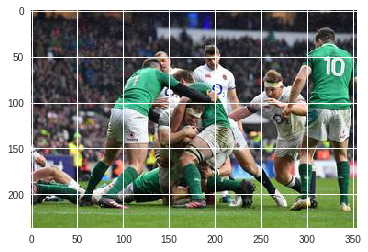

In [33]:
img = plt.imread(f'{PATH}valid/rugby/{files[2]}')
plt.imshow(img);

Here is how the raw data looks like

In [34]:
img.shape

(237, 355, 3)

In [35]:
img[:4,:4]

array([[[ 67,  42,  20],
        [ 89,  61,  39],
        [102,  70,  45],
        [ 98,  63,  35]],

       [[ 74,  49,  29],
        [ 95,  68,  47],
        [108,  78,  54],
        [105,  71,  44]],

       [[ 75,  54,  35],
        [ 98,  73,  53],
        [112,  84,  62],
        [111,  79,  54]],

       [[ 69,  51,  37],
        [ 92,  71,  54],
        [109,  84,  64],
        [110,  82,  61]]], dtype=uint8)

In [0]:
#@title Default title text


## Our first model: quick start

In [0]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [133]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[0.      0.99007 1.23203 0.5625 ]
[1.      0.92997 1.04806 0.5625 ]



## Since we had small dataset and above learner's accuracy was 0.5 


In [151]:
learn.fit(0.03, 4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

[0.      0.01164 0.55823 0.8125 ]
[1.      0.02393 0.56821 0.8125 ]
[2.      0.01857 0.57642 0.8125 ]
[3.      0.01727 0.58705 0.875  ]



### Checking Memory usage (we have limited RAM as this is on google colab)

In [85]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13029        1950        1457         281        9620       10550
Swap:             0           0           0


## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [132]:
!ls data/rugby_foot/valid/football/

football.06.jpg  football.21.jpg  football.24.jpg
football.07.jpg  football.22.jpg  football.25.jpg
football.11.jpg  football.23.jpg  football.26.jpg


In [152]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [153]:
# from here we know that 'football' is label 0 and 'rugby' is label 1.
data.classes

['football', 'rugby']

In [154]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(16, 2)

In [155]:
log_preds[:10]

array([[-0.4369 , -1.03857],
       [-0.13598, -2.06246],
       [-0.05969, -2.84834],
       [-0.00299, -5.81289],
       [-0.30536, -1.33507],
       [-0.42766, -1.05566],
       [-0.00289, -5.84958],
       [-0.24683, -1.51993],
       [-0.04075, -3.22069],
       [-0.99485, -0.46168]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [157]:
preds[:16]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [158]:
probs[:16]

array([0.35396, 0.12714, 0.05794, 0.00299, 0.26314, 0.34796, 0.00288, 0.21873, 0.03993, 0.63022, 0.96945,
       0.50466, 0.07585, 0.02094, 0.96702, 0.92428], dtype=float32)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 2, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
##only for google colb
from PIL import Image

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


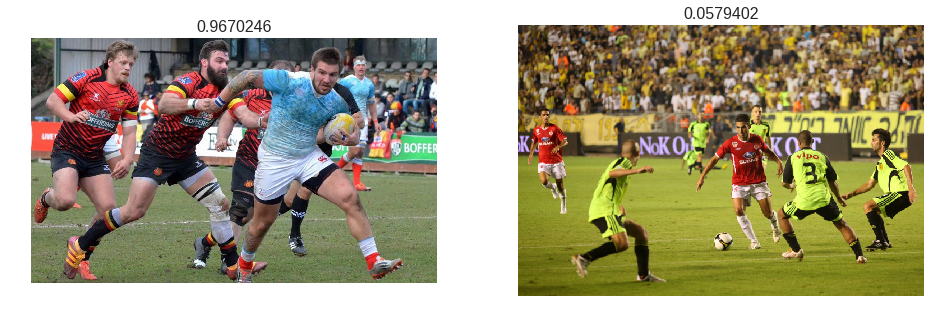

In [174]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


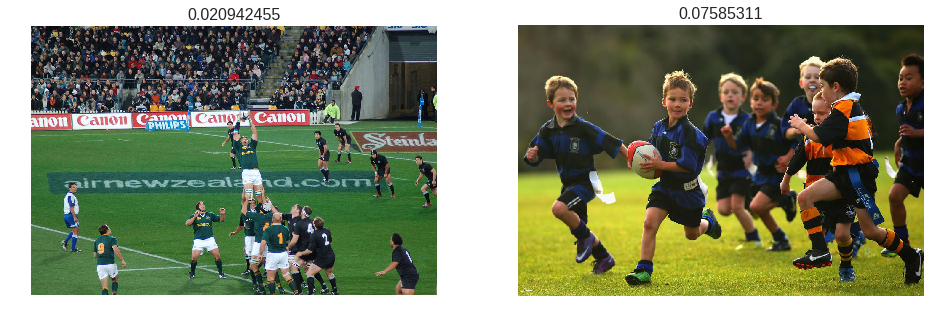

In [175]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct football


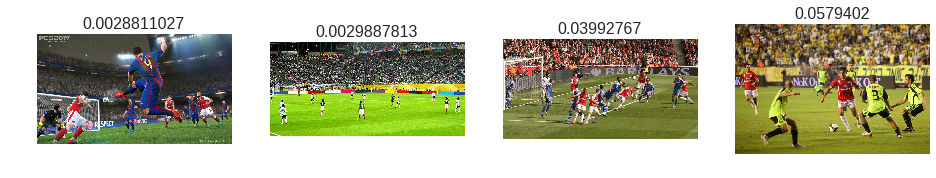

In [177]:
plot_val_with_title(most_by_correct(0, True), "Most correct football")

Most correct rugby


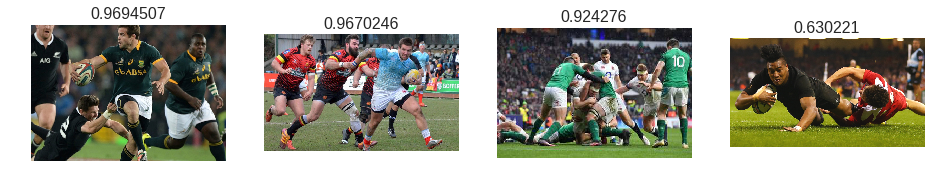

In [178]:
plot_val_with_title(most_by_correct(1, True), "Most correct rugby")

### All football are correct ones

In [181]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect football")

Most incorrect football


Most incorrect rugby


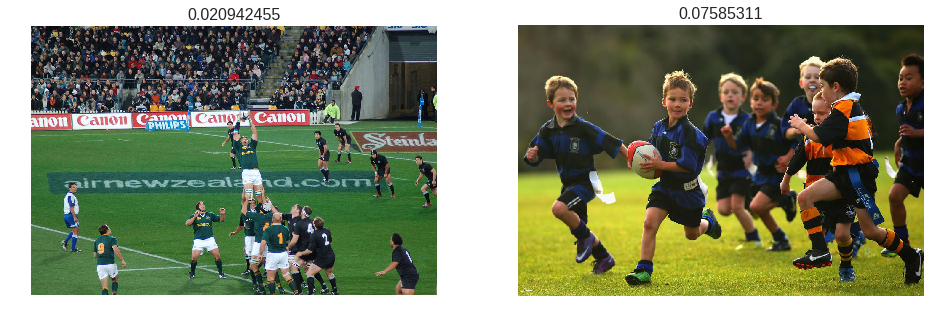

In [182]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect rugby")

Most uncertain predictions


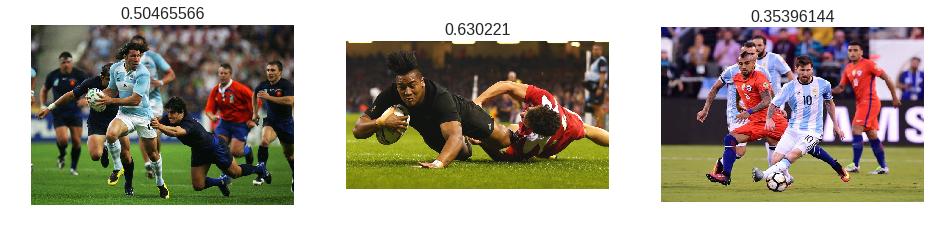

In [183]:
most_uncertain = np.argsort(np.abs(probs -0.5))[0:3]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

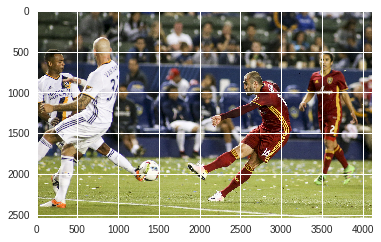

In [124]:
img = plt.imread(f'{PATH}test/{files[2]}')
plt.imshow(img);

In [0]:
# !cp data/rugby_foot/test/5.jpg data/rugby_foot/valid/rugby/rugby.24.jpg
# !cp data/rugby_foot/test/2.jpg data/rugby_foot/valid/rugby/rugby.21.jpg

In [0]:
# !cp data/rugby_foot/test/6.jpg data/rugby_foot/valid/football/football.21.jpg
# !cp data/rugby_foot/test/7.jpg data/rugby_foot/valid/football/football.22.jpg
# !cp data/rugby_foot/test/8.jpg data/rugby_foot/valid/football/football.23.jpg
# !cp data/rugby_foot/test/9.jpg data/rugby_foot/valid/football/football.24.jpg
# !cp data/rugby_foot/test/10.jpg data/rugby_foot/valid/football/football.25.jpg
# !cp data/rugby_foot/test/11.jpg data/rugby_foot/valid/football/football.26.jpg